# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"
query_url=f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | salinas
Processing Record 3 of Set 1 | koyulhisar
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | fortaleza
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | cluain meala
Processing Record 16 of Set 1 | mgandu
Processing Record 17 of Set 1 | harper
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set 

Processing Record 41 of Set 4 | ulan bator
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | jinotega
Processing Record 44 of Set 4 | zhezqazghan
Processing Record 45 of Set 4 | susuman
Processing Record 46 of Set 4 | masterton
Processing Record 47 of Set 4 | newman
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | alofi
Processing Record 0 of Set 5 | severo-yeniseyskiy
Processing Record 1 of Set 5 | mwembe
Processing Record 2 of Set 5 | lazaro cardenas
Processing Record 3 of Set 5 | bikenibeu village
Processing Record 4 of Set 5 | kingston
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | boca do acre
Processing Record 7 of Set 5 | iquique
Processing Record 8 of Set 5 | rongelap
Processing Record 9 of Set 5 | wattegama
Processing Record 10 of Set 5 | utrik
Processing Record 11 of Set 5 | papatowai
Processing Record 12 of Set 5 | enshi
Processing Record 13 of Set 5 | usinsk
Processing Record 14 of Set 5 | punt

Processing Record 31 of Set 8 | lunglei
Processing Record 32 of Set 8 | vostochnyy
Processing Record 33 of Set 8 | rabo de peixe
Processing Record 34 of Set 8 | phang nga
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | n'diareme limamoulaye
City not found. Skipping...
Processing Record 37 of Set 8 | hammerfest
Processing Record 38 of Set 8 | trenton
Processing Record 39 of Set 8 | uva
Processing Record 40 of Set 8 | callao
Processing Record 41 of Set 8 | san fernando de apure
Processing Record 42 of Set 8 | urubamba
Processing Record 43 of Set 8 | balsas
Processing Record 44 of Set 8 | aligudarz
Processing Record 45 of Set 8 | mwinilunga
Processing Record 46 of Set 8 | kassala
Processing Record 47 of Set 8 | puerto palomas
Processing Record 48 of Set 8 | raja
Processing Record 49 of Set 8 | tchibanga
Processing Record 0 of Set 9 | kalmunai
Processing Record 1 of Set 9 | lishu
Processing Record 2 of Set 9 | lewiston orchards
Processing Record 3 of Set 9 | takama

Processing Record 21 of Set 12 | whakatane
Processing Record 22 of Set 12 | san juan de miraflores
Processing Record 23 of Set 12 | ingeniero guillermo n. juarez
Processing Record 24 of Set 12 | fale old settlement
Processing Record 25 of Set 12 | antsiranana
Processing Record 26 of Set 12 | vylkove
Processing Record 27 of Set 12 | fort st. john
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | acapulco de juarez
Processing Record 30 of Set 12 | san pedro pochutla
Processing Record 31 of Set 12 | faro
Processing Record 32 of Set 12 | almeirim
Processing Record 33 of Set 12 | bulancak
Processing Record 34 of Set 12 | nyurba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,12.75,91,10,1.99,ZA,1683504169
1,salinas,36.6777,-121.6555,19.99,58,0,6.17,US,1683504435
2,koyulhisar,40.3025,37.8311,9.56,91,85,1.65,TR,1683504435
3,iqaluit,63.7506,-68.5145,-3.15,68,20,5.66,CA,1683504013
4,hermanus,-34.4187,19.2345,14.47,85,18,3.90,ZA,1683504173


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

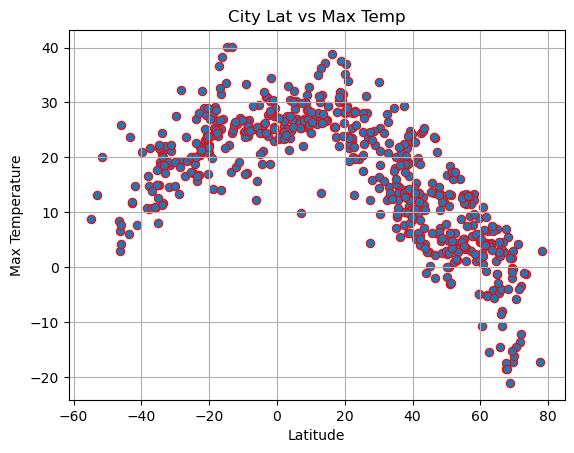

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='red', linewidth=.8)

# Incorporate the other graph properties
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

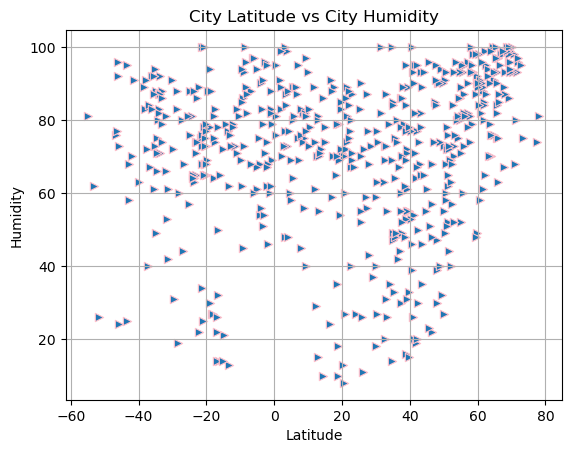

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='>', edgecolor='pink', linewidth=.8)

# Incorporate the other graph properties
plt.title('City Latitude vs City Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

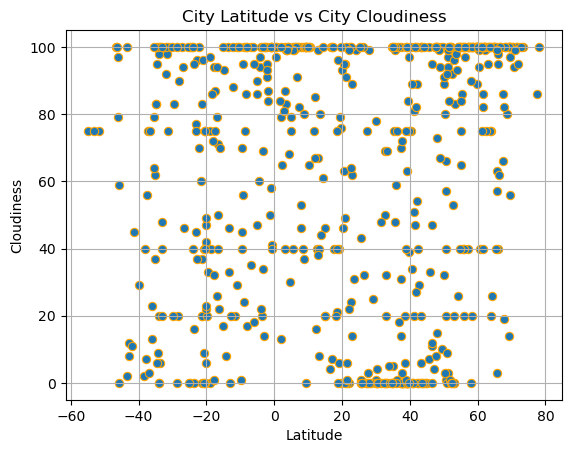

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='orange', linewidth=.8)

# Incorporate the other graph properties
plt.title('City Latitude vs City Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

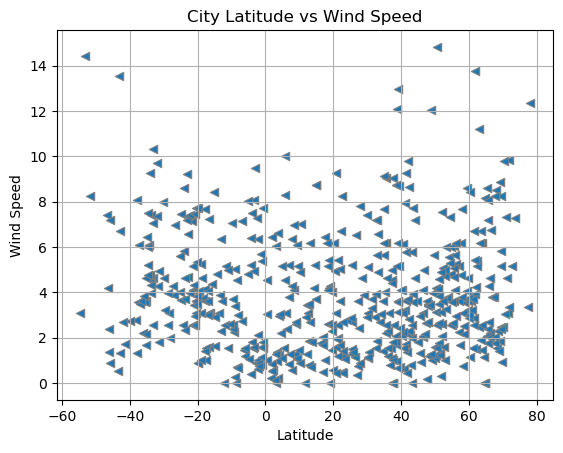

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='<', edgecolor='grey', linewidth=.8)


# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()


# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def lin_reg(x,y, xlab, ylab, sctit, anox, anoy):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, (anox,anoy), fontsize=18, color='green')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(sctit)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


    

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7161472181434118


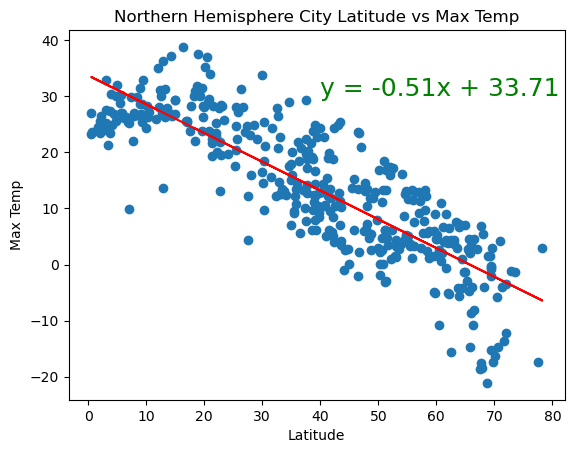

In [42]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'], "Latitude", "Max Temp", f"Northern Hemisphere City Latitude vs Max Temp", 40, 30)
        
        
 
        

The r-squared is: 0.4121057168607245


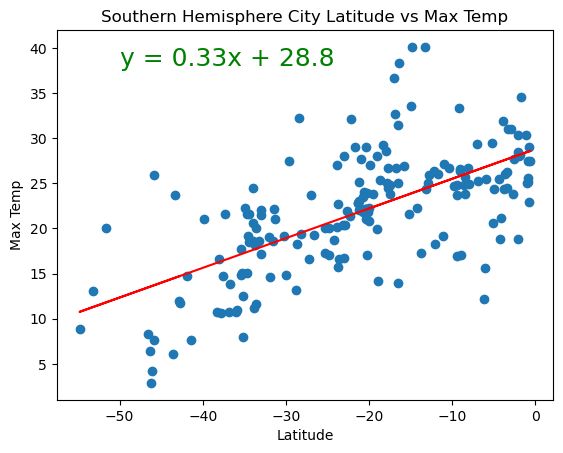

In [51]:
# Linear regression on Southern Hemisphere

lin_reg(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'], "Latitude", "Max Temp", f"Southern Hemisphere City Latitude vs Max Temp", -50, 38)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The nornthern cities have a negative correlation between latitude and max temp. Which makes sense because the closer to 0 you are the closer to the equater you are. So it makes sense for the southern hemisphere to have the opposite correlation. Because the graph starts far away from zero latitide and get bigger closer to 0.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05689741545789599


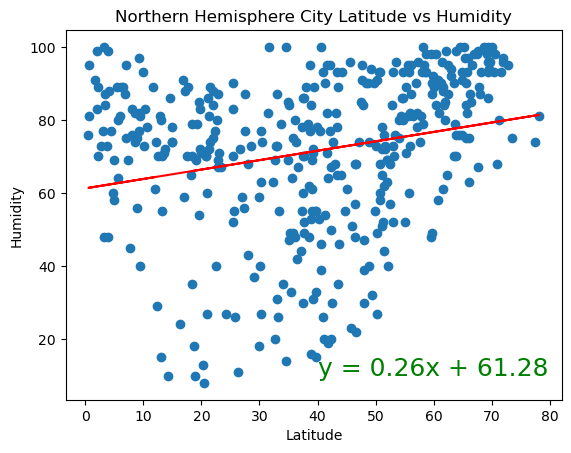

In [59]:
# Northern Hemisphere
lin_reg(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], "Latitude","Humidity", f"Northern Hemisphere City Latitude vs Humidity", 40,10)



The r-squared is: 0.0002808747046324616


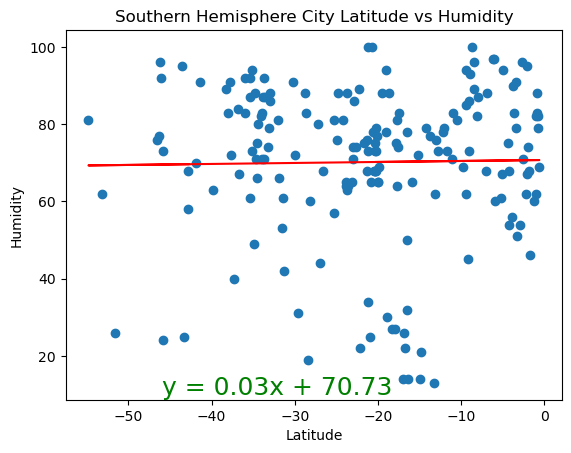

In [63]:
# Southern Hemisphere
lin_reg(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], "Latitude","Humidity", f"Southern Hemisphere City Latitude vs Humidity", -46,10)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

It seems that the northern hemisphere has a slight positive correlation. Meaning that there is more humidity in places with a higher latitude. Then for the southern hemisphere there is barley a slope, meaning that there is not a real correlation between latitude and humidity in the southern hemisphere. Also the r value squared is so small it indicates no real correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024026517125811008


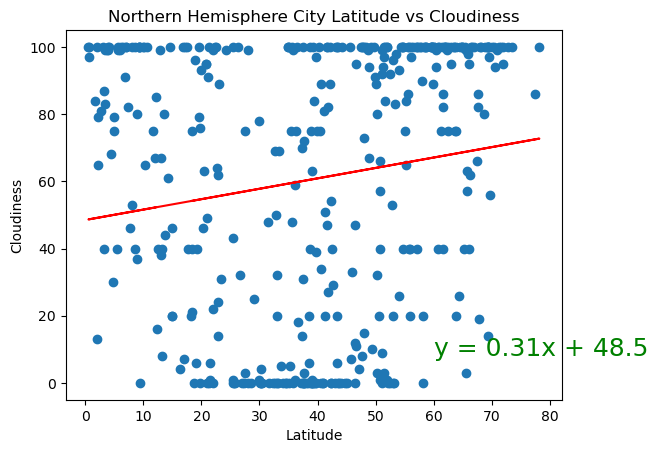

In [72]:
# Northern Hemisphere
lin_reg(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'], "Latitude","Cloudiness", f"Northern Hemisphere City Latitude vs Cloudiness", 60,8)


The r-squared is: 0.020567354299943663


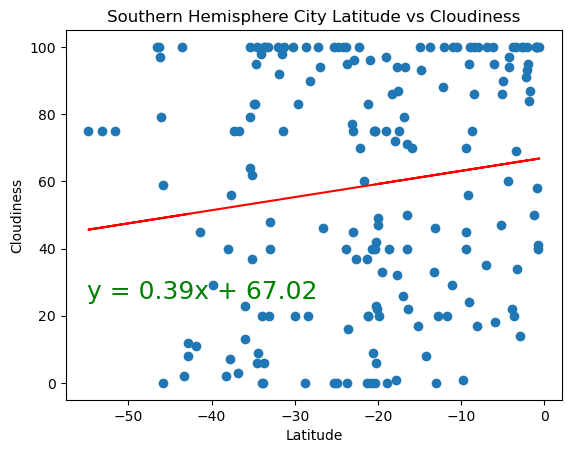

In [82]:
# Southern Hemisphere
lin_reg(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'], "Latitude","Cloudiness", f"Southern Hemisphere City Latitude vs Cloudiness", -55,25)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

There isn't a real correlation for the northern or southern hemisphere. The r value squared very small too. They have close to the same slope but there are a lot of differences between two cities at the same latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030396762354449474


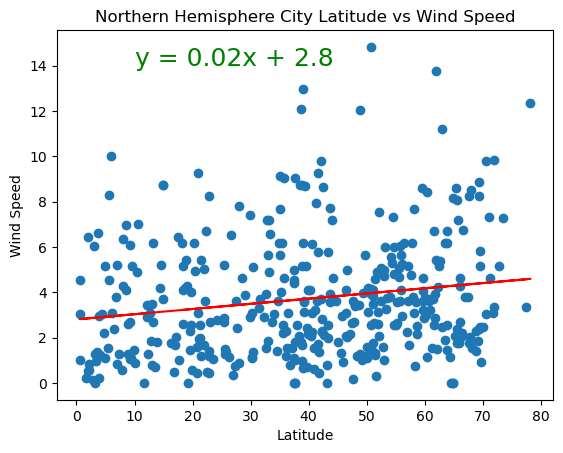

In [87]:
# Northern Hemisphere
lin_reg(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'], "Latitude","Wind Speed", f"Northern Hemisphere City Latitude vs Wind Speed", 10,14)



The r-squared is: 0.06223904070051575


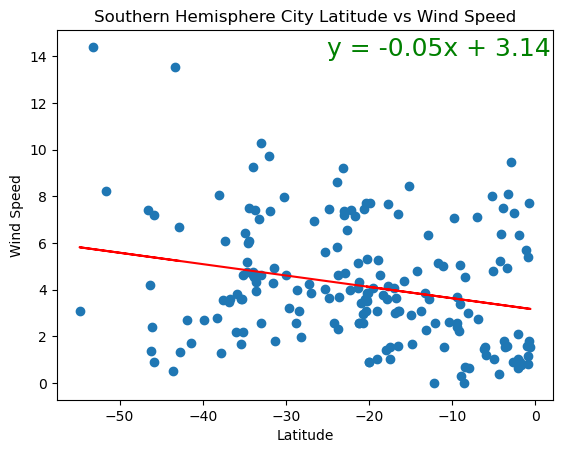

In [90]:
# Southern Hemisphere
lin_reg(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'], "Latitude","Wind Speed", f"Southern Hemisphere City Latitude vs Wind Speed", -25,14)



**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a weak positive correlation for the northern hemisphere and a weak negative slope for the southern hemisphere. Meaning that there isn't a huge correlation there. But according the the slopes its the least windy closest to 0 latitude.